# Density/Contour Plots

Sometimes it is useful to display three-dimensional data in two-dimensions using
*contours* or *color-coded regions*. There are three matplotlib functions which can be
helpful for this task: `plt.contour()` for contour plots, `plt.contourf()` for filled contour
plots, and `plt.imshow()` for showing images. We’ll see several examples of using these
below.

## 3D Functions

We’ll start by demonstrating a contour plot using a function $z = f(x, y)$ , using the following
particular choice for $f$.

Let
$$
f(x,y) = \frac{1}{1 + x^2 + y^2}
$$

$z$ could be the "*height*" at each $(x, y)$ pair, or some other quantity which varies as a function of two independent variables.

In [1]:
# these are done in my startup file
# import matplotlib.pyplot as plt
# import numpy as np

def f(x,y):
    return 1/(1 + x**2 + y**2)

# Contour Plots

A **contour** plot can be created with the `plt.contour()` function. It takes three arguments:
a grid of **x** values, a grid of **y** values, and a grid of **z** values. The $x$ and $y$ values
represent *positions* on the plot, and the *z* values will be represented by the contour
levels. Perhaps the most straightforward way to prepare such data is to use the
`np.meshgrid()` function.

Consider the 2-dimensional grid of points between $x = [0,...,5]$ and $y = [0,...,3]$

In [2]:
# Create an array of 6 equally spaced values from 0-5 for x
x = np.linspace(0, 5, 6)

# Create an array of 6 equally spaced values from 0-3 for y
y = np.linspace(0, 3, 6)

print(x)
print()  # Empty line break
print(y)

[0. 1. 2. 3. 4. 5.]

[0.  0.6 1.2 1.8 2.4 3. ]


We can plot these two arrays in a simple scatter plot.

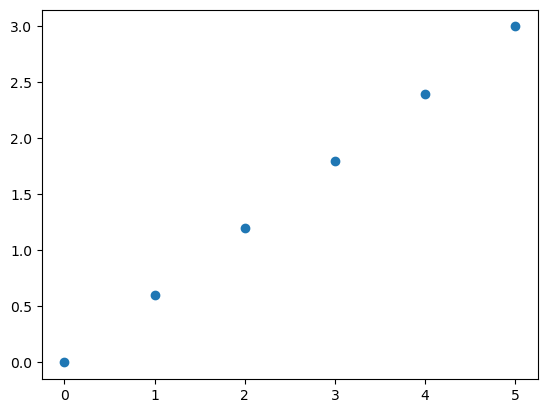

In [3]:
# Plot (x, y) in a scatter plot
plt.scatter(x, y)

# Show the figure
plt.show()

`np.meshgrid()` is a *Numnpy* broadcasting function (remember *Broadcasting*?), which makes two 2-dimensional arrays that have the values of $x$ and $y$ on a 2-dimensional grid of points.




In [4]:
# Create a meshgrid from the x and y arrays, which generates coordinate matrices for vectorized evaluation
# See: https://numpy.org/doc/2.1/reference/generated/numpy.meshgrid.html
X, Y = np.meshgrid(x, y)

print(X)
print()
print(Y)

[[0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]]

[[0.  0.  0.  0.  0.  0. ]
 [0.6 0.6 0.6 0.6 0.6 0.6]
 [1.2 1.2 1.2 1.2 1.2 1.2]
 [1.8 1.8 1.8 1.8 1.8 1.8]
 [2.4 2.4 2.4 2.4 2.4 2.4]
 [3.  3.  3.  3.  3.  3. ]]


The (capitalized) **X** and **Y** arrays hold the value of the $x$ and $y$ coordinates at each point, and `np.meshgrid()` produces these from two 1-dimensional arrays, *x* and *y*, returning two, 2-dimensional arrays **X** and **Y**.

These arrays are what the contour and 3D plotting routines use.

Since we used *Numpy* functions to construct our $z = f(x, y)$ (didn't we??), *Numpy* will broadcast the function over these arrays, **X** and **Y**, to create a similar 2-dimensional array **Z** of "height" values.

In [5]:
# Evaluate the function f at every point in the meshgrid to produce the Z values
Z = f(X, Y)
Z

array([[1.        , 0.5       , 0.2       , 0.1       , 0.05882353,
        0.03846154],
       [0.73529412, 0.42372881, 0.18656716, 0.0965251 , 0.05760369,
        0.03793627],
       [0.40983607, 0.29069767, 0.1552795 , 0.08741259, 0.05422993,
        0.03644315],
       [0.23584906, 0.19083969, 0.12135922, 0.0755287 , 0.04940711,
        0.03419973],
       [0.14792899, 0.12886598, 0.0929368 , 0.06345178, 0.04393673,
        0.03148615],
       [0.1       , 0.09090909, 0.07142857, 0.05263158, 0.03846154,
        0.02857143]])

which we can now use with the *pyplot* routine `plt.contour()`.

## `plt.contour()` and `plt.contourf()`

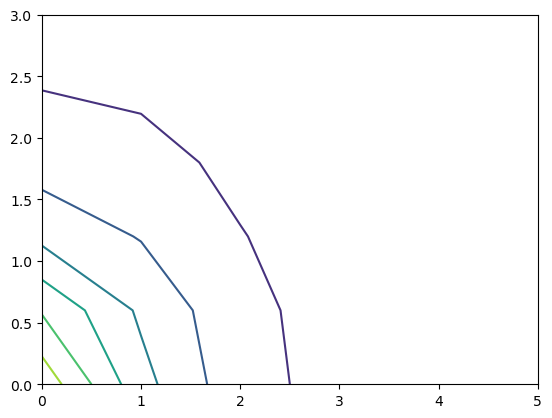

In [6]:
# Plot the contour lines
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
plt.contour(X, Y, Z)

# Show the figure
plt.show()

Let's make a more detailed plot, centered on $(0, 0)$.

In [7]:
# Create arrays of 50 equally spaced values from -2 to 2 for the x and y
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)

# Create a meshgrid from the x and y arrays, which generates coordinate matrices for vectorized evaluation
X, Y = np.meshgrid(x, y)

# Evaluate the function f at every point in the meshgrid to produce the Z values
Z = f(X, Y)

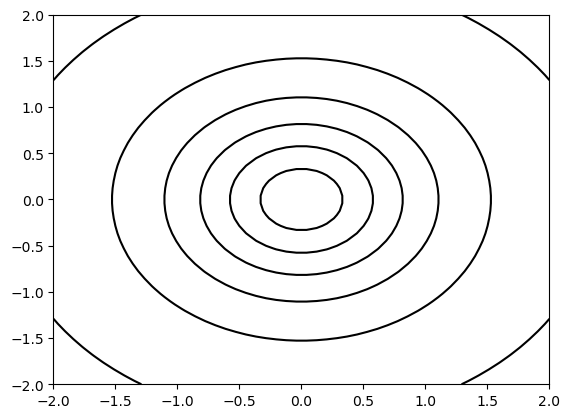

In [8]:
# Plot the contour lines using the new data
# Notice how you can control the color
plt.contour(X, Y, Z, colors='black')

plt.show()

Does this make sense to you? Think about the function: 
$$
z = \frac{1}{1 + x^2 + y^2}
$$ 

It is maximum $z = 1$ at $(x, y) = (0, 0)$. Moving out away from $(x,y) = (0,0)$, it decreases.

In [9]:
# Play around with different values for (x, y) and notice how z decreases
x_test = 0
y_test = 0
z_test = f(x_test, y_test)
print(z_test)

1.0


That's what the *contour* plot shows.

Consider the more interesting function:
$$
z = f(x,y) = \frac{\sin(x \cdot y)}{1 + x^2 + y^2}
$$

This one oscillates because of the $\sin()$, which means $z$ will be negative in some regions.

In [10]:
def f(x, y):
    return np.sin(x*y)/(1+ x**2 + y**2)

In [11]:
# Create arrays of 50 equally spaced values from -2 to 2 for the x and y
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)

# Create a meshgrid from the x and y arrays, which generates coordinate matrices for vectorized evaluation
X, Y = np.meshgrid(x, y)

# Evaluate the function f at every point in the meshgrid to produce the Z values
Z = f(X, Y)

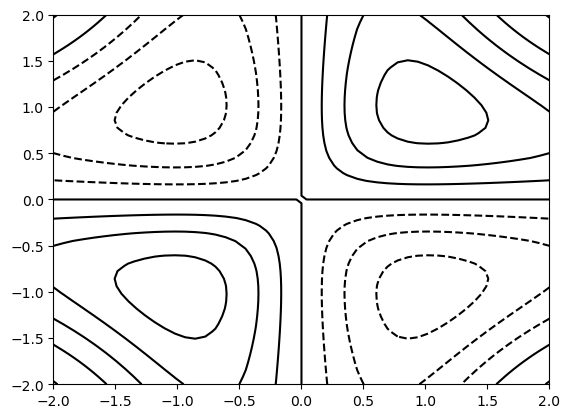

In [12]:
# Plot the contour lines
plt.contour(X, Y, Z, colors='black')

# Show the figure
plt.show()

Which parts do you think are negative?

In [13]:
# Play around with different values for (x, y) and note whether z is negative or positive
x_test = 0
y_test = 0
z_test = f(x_test, y_test)
print(z_test)

0.0


When a single color is used, negative values are represented by
dashed lines, and positive values by solid lines. 

Alternatively, the lines can be colorcoded by specifying a *colormap* with the `cmap` argument. 
Here, we’ll also specify that we want more lines to be drawn: 20 equally-spaced intervals within the data range:

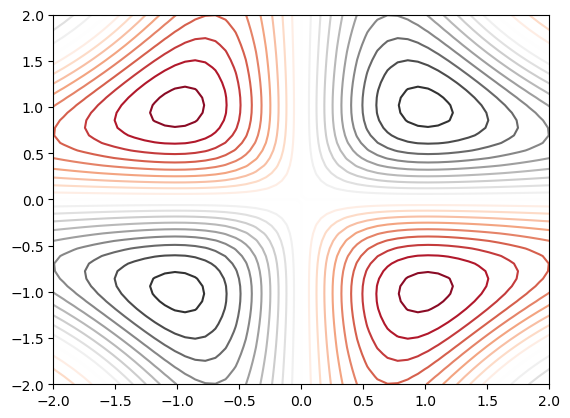

In [14]:
# Plot contour lines
plt.contour(X, Y, Z, 20, cmap='RdGy')

# Show the figure
plt.show()

Here we chose the **RdGy** (short for Red-Gray) colormap, which is a good choice for
centered data. Matplotlib has a wide range of colormaps available, which you can
easily browse in Jupyter by typing

In [ ]:
plt.cm.<TAB>

The above plot is looking nicer, but the spaces between the lines may be a bit distracting.

We can change this by switching to a **filled contour plot** using the `plt.contourf()` function (notice the *f* at the end), which uses largely the same syntax as `plt.contour()`.

Additionally, we’ll add a `plt.colorbar()` command, which automatically creates an
additional axis with labeled color information for the plot:

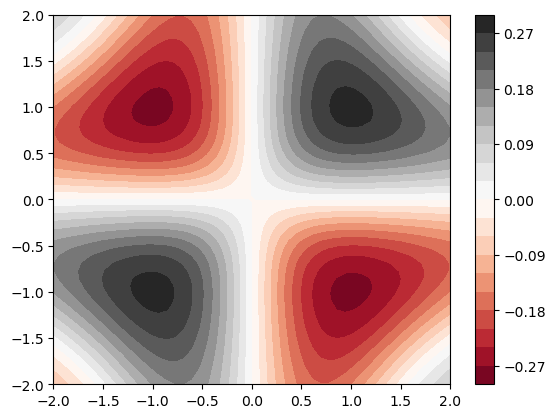

In [15]:
# Plot filled contour lines
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
plt.contourf(X, Y, Z, 20, cmap='RdGy')

# Add a color bar
plt.colorbar()

# Display the figure
plt.show()

The colorbar makes it clear that the dark regions are “peaks”, while the red regions are
“valleys”.

One potential issue with this plot is that it is a bit “splotchy”. That is, the color steps
are discrete rather than continuous, which is not always what is desired. This could be
remedied by setting the number of contours to a very high number, but this results in
a rather inefficient plot: matplotlib must render a new polygon for each step in the
level.

## `plt.imshow()`

A better way to handle this is to use the `plt.imshow()` function, which interprets
at two-dimensional grid of data as an image. There are a few potential gotchas
in this, however:

• `plt.imshow()` doesn’t accept an **X** and **Y** grid, so you must manually specify the
extent `[xmin, xmax, ymin, ymax]` of the image on the plot.

• `plt.imshow()` by default follows the standard image array definition where the
origin is in the upper-left, not in the lower-left as in most contour plots. This
must be changed when showing gridded data.


Here is what the result looks like:

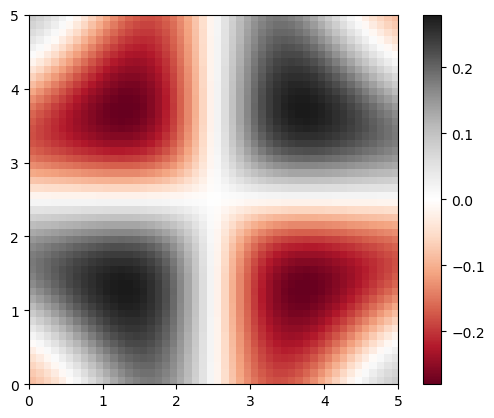

In [16]:
# Use imshow to visualize the 2D array Z as an image, where 'extent' defines the axis range, 
#'origin' sets the (0,0) position to the lower-left, and 'cmap' specifies the colormap
# This effectively creates a contour-like plot
# See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')

# Add a color bar
plt.colorbar()

# Show the figure
plt.show()

*Smooth...*

Finally, it can sometimes be useful to combine contour plots and image plots. 

Here is an example of this where we can use a partially transparent background image (with
transparency set via the **alpha** parameter) and overplot contours with labels on the
contours themselves using the `plt.clabel()` function.

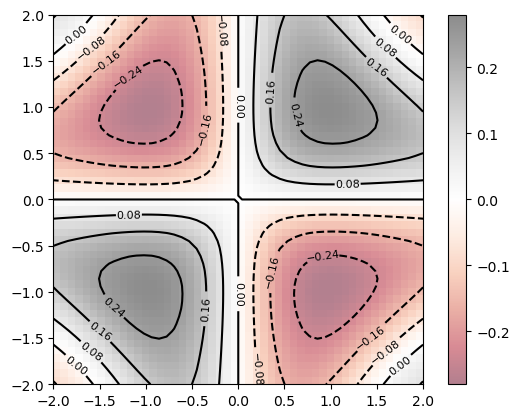

In [17]:
# Generate contour lines for the 2D array Z using the X and Y coordinate grids
# The number 6 specifies the number of contour levels, and 'colors' sets the lines to black
contours = plt.contour(X, Y, Z, 6, colors='black')

# Label the contour lines with their respective values, placing labels inline and setting font size to 8
plt.clabel(contours, inline=True, fontsize=8)

# Use imshow to visualize the 2D array Z as an image
plt.imshow(Z, extent=[-2, 2, -2, 2], origin='lower', cmap='RdGy', alpha=0.5)

# Add a color bar
plt.colorbar()

# Show figure
plt.show()

Show up to your next monthly sales meeting showing your data like *this*, and you might get that raise!

We can plot the same data in 3-dimensions, which makes it easier to see the montains (positive) and valleys (negative).

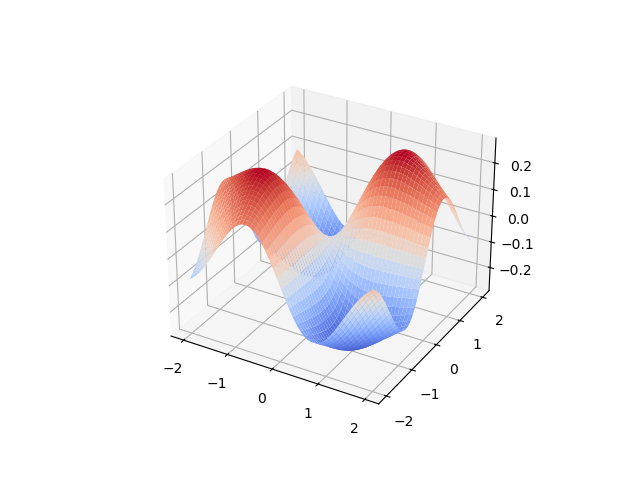

In [19]:
import matplotlib as mpl

# When I do 3D plots, I always turn on %matplotlib widget so I can interact with figure via the mouse
%matplotlib widget

# Create figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm)

# Show the figure
plt.show()